        x1       x2  y
0  6.50000  0.00000  0
1 -6.50000 -0.00000  1
2  6.31380  1.25590  0
3 -6.31380 -1.25590  1
4  5.88973  2.43961  0
(194, 2)
(194,)


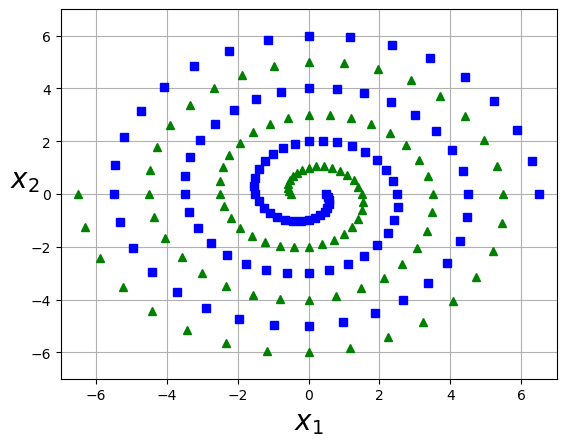

In [330]:
import numpy as np
import pandas
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import torch as torch
import torch.nn as nn

data = pandas.read_csv('datasets/spiralsdataset.csv', header=None, names=['x1','x2','y'])
print(data.head(5))

# Split into numpy arrays with features and labels
X = data[['x1', 'x2']].to_numpy()
y = data[['y']].to_numpy().flatten()
print(X.shape)
print(y.shape)

def plot_dataset(X, y, axes):
    """Plot a dataset with two features and binary classes"""
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
axes = [-7, 7, -7, 7]
plot_dataset(X, y, axes)


Now we will convert the data into torch values that pyTorch can use in a useful way and then we can create a feed forward NN to learn on the data, the first step being defining the FFNN

In [331]:

# Convert the labels to one-hot encoding
# y = np.eye(2)[y]

# Convert the features and labels to PyTorch tensors
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)
# Define the FFNN architecture

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size,hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        return x

We now can define input and output size, aswell as hidden size learning rate and num_epochs, experimenting with these and recording results should help us determine a good set of values for each of these.

In [332]:
#Define Input and Output layer Size
input_layers = 2
output_layers = 2
#The Hidden layer is meant to be 2/3 of the input layer + the output layer.
#Since it is binary classification the output layer can either be 1 or 2 however we will use 2.
hidden_layers = 5
learning_rate = 0.01
epoch_count = 1000

network = Net(input_layers,hidden_layers,output_layers)


Now that the network is defined and we have the initial values for learning rate and epoch count, we will make the initial attempt at classification

In [333]:
inputX = X[:,:2] 
# # print(inputX)
# inputs = torch.from_numpy(X).float()

# labels = torch.from_numpy(y).long()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate)

# Train the FFNN on the two-spiral task dataset
for epoch in range(epoch_count):
    optimizer.zero_grad()
    # Forward pass
    outputs = network(X) 
    loss = criterion(outputs, y)

    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Print training progress
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epoch_count, loss.item()))


Epoch [10/1000], Loss: 1.5974
Epoch [20/1000], Loss: 1.5671
Epoch [30/1000], Loss: 1.5384
Epoch [40/1000], Loss: 1.5112
Epoch [50/1000], Loss: 1.4854
Epoch [60/1000], Loss: 1.4610
Epoch [70/1000], Loss: 1.4381
Epoch [80/1000], Loss: 1.4164
Epoch [90/1000], Loss: 1.3960
Epoch [100/1000], Loss: 1.3767
Epoch [110/1000], Loss: 1.3585
Epoch [120/1000], Loss: 1.3412
Epoch [130/1000], Loss: 1.3249
Epoch [140/1000], Loss: 1.3094
Epoch [150/1000], Loss: 1.2947
Epoch [160/1000], Loss: 1.2807
Epoch [170/1000], Loss: 1.2673
Epoch [180/1000], Loss: 1.2546
Epoch [190/1000], Loss: 1.2424
Epoch [200/1000], Loss: 1.2306
Epoch [210/1000], Loss: 1.2194
Epoch [220/1000], Loss: 1.2086
Epoch [230/1000], Loss: 1.1982
Epoch [240/1000], Loss: 1.1882
Epoch [250/1000], Loss: 1.1786
Epoch [260/1000], Loss: 1.1693
Epoch [270/1000], Loss: 1.1603
Epoch [280/1000], Loss: 1.1516
Epoch [290/1000], Loss: 1.1432
Epoch [300/1000], Loss: 1.1352
Epoch [310/1000], Loss: 1.1274
Epoch [320/1000], Loss: 1.1198
Epoch [330/1000],

Now that it has been trained on the data set we can use a scatter plot to visualize the results.

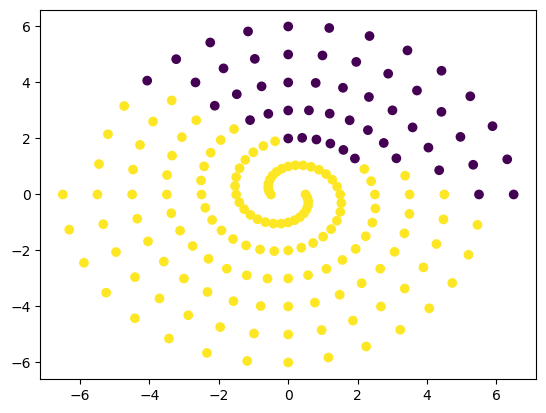

In [334]:
# Get predicted class labels for each input point
_, predicted = torch.max(outputs.data, 1)

# Convert to numpy array for plotting
predicted = predicted.numpy()

# Plot input data with color-coded predictions
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=predicted.flatten())
plt.show()


Epoch [100/1000], Loss: 0.6316
Epoch [200/1000], Loss: 0.4464
Epoch [300/1000], Loss: 0.3990
Epoch [400/1000], Loss: 0.3560
Epoch [500/1000], Loss: 0.3011
Epoch [600/1000], Loss: 0.2348
Epoch [700/1000], Loss: 0.1505
Epoch [800/1000], Loss: 0.0778
Epoch [900/1000], Loss: 0.0453
Epoch [1000/1000], Loss: 0.0273


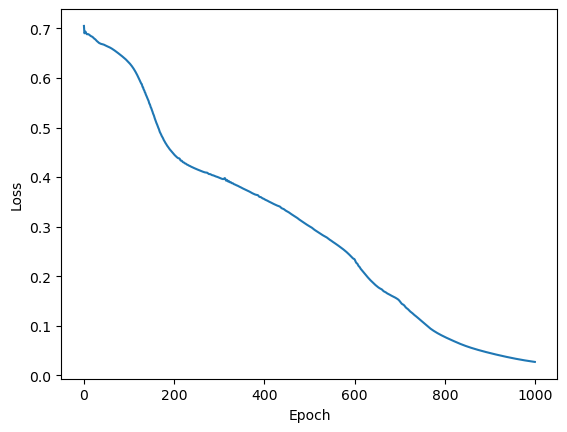

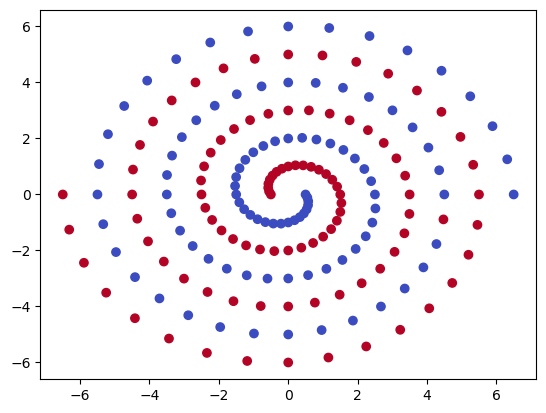

In [336]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('datasets/spiralsdataset.csv', header=None, names=['x1', 'x2', 'y'])

# Split the dataset into features and labels
X = data[['x1', 'x2']].to_numpy()
y = data['y'].to_numpy()

# Convert the labels to one-hot encoding
y = np.eye(2)[y]

# Convert the features and labels to PyTorch tensors
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

# Define the FFNN architecture
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.activation = nn.Tanh()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.fc3(x)
        x = nn.Softmax(dim=1)(x)
        return x

# Set the hyperparameters
input_size = 2
hidden_size = 20
output_size = 2
learning_rate = 0.01
num_epochs = 1000

# Create the FFNN
net = Net(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# Train the FFNN
loss_list = []
for epoch in range(num_epochs):
    # Zero the gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = net(X)
    loss = criterion(outputs, y)
    loss_list.append(loss.item())
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))

# Plot the loss
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Evaluate the FFNN
with torch.no_grad():
    outputs = net(X)
    predicted = torch.argmax(outputs, dim=1)

# Plot the dataset with the predicted classes
plt.scatter(X[:, 0], X[:, 1], c=predicted, cmap='coolwarm')
plt.show()
